In [ ]:
from google.colab import drive
drive.mount('/content/drive') # 此處需要登入 google 帳號

import os

os.chdir('/content/drive/My Drive/MyResearch') #切換該目錄

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1 Word Analysis

### With Stop Word

In [ ]:
def calculate_word(text_file):  ##不含頻率
  k = text_file.readlines()
  total=''
  for item in k:
    str = item.split(' ')
    for i in str:
      i=i.strip()   #remove \n
      i=i.lower()   #轉小寫
      total+=i+' '

  total=total.split(' ')  #無排序
  word_list=[]
  for item in total:
    if item not in word_list:
      word_list.append(item)

  return word_list

In [ ]:
### 計算Similarity 已經包含兩種計算方式
def Similarity1_Similarity2(set1,set2):
  intersection = set(set1) .intersection(set(set2) )
  union=set(set1) .union(set(set2) )
  Similarity1 = len(intersection)/max(len(set(set1) ), len(set(set2) ))
  Similarity2 = 2*len(intersection)/ (len(set(set1))+len(set(set2)))

  return Similarity1,Similarity2

In [ ]:
### 人 語音段落 記得改
# 人的選項 A1 A2 B1 B2 段落選項 en1 en2 en3 en4 en5
person1='A1'
person2='A2'
paragraph='en1'

# with open('./20211103語音部分/%s/%s.txt'%(person1,paragraph), 'r') as f1:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person1,paragraph), 'r') as f1:
  w1=calculate_word(f1)

# with open('./20211103語音部分/%s/%s.txt'%(person2,paragraph), 'r') as f2:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person2,paragraph), 'r') as f2:
  w2=calculate_word(f2)

Similarity1_Similarity2(w1,w2)

(0.5422535211267606, 0.5767790262172284)

### Without Stop Word

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def calculate_word(text_file):  ##不含頻率
  k = text_file.readlines()
  total=''
  for item in k:
    str = item.split(' ')
  # str=str.strip()
  # print(str)
    for i in str:
      i=i.strip()   #remove \n
      i=i.lower()   #轉小寫
      total+=i+' '

  total=total.split(' ')  #無排序
  word_list=[]
  for item in total:
    if item not in word_list:
      word_list.append(item)

  return word_list

In [ ]:
##移除stop word
def remove_stopword(input_word):
  without_stopword=[]
  en_stops = set(stopwords.words('english'))
  for word in input_word: 
    if word not in en_stops:
        without_stopword.append(word)

  return without_stopword

In [ ]:
### 計算Similarity 已經包含兩種計算方式
def Similarity1_Similarity2(set1,set2):
  intersection = set(set1) .intersection(set(set2) )
  union=set(set1) .union(set(set2) )
  Similarity1 = len(intersection)/max(len(set(set1) ), len(set(set2) ))
  Similarity2 = 2*len(intersection)/ (len(set(set1))+len(set(set2)))

  return Similarity1,Similarity2

In [ ]:
### 路徑記得改
### 人 語音段落 記得改
# 人的選項 A1 A2 B1 B2 段落選項 en1 en2 en3 en4 en5
person1='A1'
person2='A2'
paragraph='en1'

# with open('./20211103語音部分/%s/%s.txt'%(person1,paragraph), 'r') as f1:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person1,paragraph), 'r') as f1:
  w1=calculate_word(f1)
  output1=remove_stopword(w1)

# with open('./20211103語音部分/%s/%s.txt'%(person2,paragraph), 'r') as f2:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person2,paragraph), 'r') as f2:
  w2=calculate_word(f2)
  output2=remove_stopword(w2)

Similarity1_Similarity2(output1,output2)

(0.4111111111111111, 0.43529411764705883)

## Part 2 Semantic-realted Analysis

In [ ]:
import spacy 
# nlp = spacy.load("en")
nlp = spacy.load("en_core_web_sm")

In [ ]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

In [ ]:
def find_entity(filename):
  dict_t=dict()
  document = open(filename).read()
  document = document.lower()
  document = nlp(document)
  
  labels = set([w.label_ for w in document.ents]) 
  for label in labels: 
      # entities = [cleanup(e.string) for e in document.ents if label==e.label_] 
      entities = [cleanup(e.text) for e in document.ents if label==e.label_]
      entities = list(set(entities)) 
      dict_t[label]=entities
      print (label,entities)

In [ ]:
### 指印出特定兩個人的某一段語音 路徑一樣要改
print('Person 1 :')
find_entity('./20211103語音部分/B1/en1.txt')
print()
print('Person 2 :')
find_entity('./20211103語音部分/B2/en2.txt')

Person 1 :
PERSON ['lin-manuel', 'ida laila']
TIME ['midnight']
DATE ['years', 'only about 3 days', 'yesterday', '6 months']
NORP ['chinese']
GPE ['bundesliga', 'hong kong', 'taiwan', 'malaysia', 'japan', 'china', 'singapore', 'taipei']
LOC ['asia']
ORDINAL ['first']
LANGUAGE ['mandarin', 'taiwanese']

Person 2 :
DATE ['today', 'over a hundred years ago']
NORP ['japanese', 'taiwanese']
GPE ['taipei', 'japan']


In [ ]:
### 印出所有語音段落
per_list=['A1','A2','B1','B2']
paragraph_list=['en1','en2','en3','en4','en5']

for person in per_list:
  for para in paragraph_list:
    filename=person+'_'+para
    print(person,para,":")
    # find_entity('./20211103語音部分/%s/%s.txt'%(person,para))
    find_entity('./20220308語音加無線訊號/%s/%s.txt'%(person,para))
    print()

A1 en1 :
DATE ['tomorrow']

A1 en2 :
DATE ['today']
TIME ['tonight', 'morning']

A1 en3 :
ORDINAL ['secondly']
GPE ['canada']
ORG ['lowe']

A1 en4 :
CARDINAL ['one', 'a half']
DATE ['tomorrow', 'a decade']

A1 en5 :
CARDINAL ['three']
GPE ['iowa', 'u.s.']

A2 en1 :
DATE ['tomorrow', 'days ago', '6 months', 'that day']
PERSON ['austin', 'sam', 'kathy bona']

A2 en2 :
DATE ['today']
ORG ['nrt3']

A2 en3 :
CARDINAL ['two']
PERSON ['jenna.']

A2 en4 :
CARDINAL ['one']
DATE ['today', 'tomorrow']
PERSON ['alito']

A2 en5 :
CARDINAL ['three']
PERSON ['bobby bonilla iowa']
ORG ['costco\nimmigration']
TIME ['8/2 hours ago']

B1 en1 :
GPE ['japan', 'hong kong', 'taiwan', 'iowa', 'singapore', 'taipei', 'china']
CARDINAL ['106', 'two']
DATE ['only about 3 days', 'just under a year-and-a-half']
LOC ['asia']
NORP ['taiwanese', 'christian', 'chinese']
ORG ['midland\njapan']
ORDINAL ['first']

B1 en2 :
DATE ['today', '100 years ago']
NORP ['japanese']
GPE ['japan', 'taipei']

B1 en3 :
DATE ['today']
N

In [ ]:
### 這邊要自己整理  20211103的資料
###用spaCy算內積
##'NORP','ORG','PERSON','DATE','TIME','CARDINAL','GPE','QUANTITY','MONEY','LOC','ORDINAL','LANGUAGE','WORK_OF_ART','PRODUCT','FAC'
import numpy as np
A1_1_label=[0,1,1,2,0,0,0,0,0,0,0,0,0,0,0]
A1_2_label=[0,0,0,0,3,0,0,0,0,0,0,0,0,0,0]
A1_3_label=[0,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
A1_4_label=[0,1,1,3,0,1,0,1,1,0,0,0,1,0,0]
A1_5_label=[0,1,0,0,1,2,0,0,0,0,0,0,0,0,0]

A2_1_label=[0,1,0,2,0,0,0,0,0,0,0,0,0,0,0]
A2_2_label=[0,0,0,1,3,1,0,0,0,0,0,0,0,0,0]
A2_3_label=[0,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
A2_4_label=[0,2,0,3,0,1,0,1,1,0,0,0,0,0,0]
A2_5_label=[0,2,0,0,1,1,0,0,0,0,0,0,0,0,0]

B1_1_label=[3,0,0,5,0,1,7,0,0,1,1,1,0,0,0]
B1_2_label=[1,0,0,2,0,0,1,0,0,0,0,0,0,0,0]
B1_3_label=[1,0,1,0,0,0,0,0,0,0,1,1,0,0,0]
B1_4_label=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
B1_5_label=[0,0,0,0,0,0,2,0,0,0,1,0,0,0,0]

B2_1_label=[3,0,1,8,0,0,7,0,0,0,1,1,0,0,0]
B2_2_label=[1,0,0,2,0,0,2,0,0,0,0,1,0,0,0]
B2_3_label=[1,1,2,1,0,0,1,0,0,0,1,0,0,0,0]
B2_4_label=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
B2_5_label=[0,1,4,1,0,0,1,0,0,0,0,0,0,0,0]

In [ ]:
### 這邊要自己整理  20220308的資料
###用spaCy算內積
##'NORP','ORG','PERSON','DATE','TIME','CARDINAL','GPE','QUANTITY','MONEY','LOC','ORDINAL','LANGUAGE','WORK_OF_ART','PRODUCT','FAC'  共15個
# import numpy as np
# A1_1_label=[0,0,0,1,1,0,0,0,0,0,0,0,0,0,0]
# A1_2_label=[0,0,0,1,2,0,0,0,0,0,0,0,0,0,0]
# A1_3_label=[1,0,1,1,0,0,1,0,0,0,1,0,0,0,0]
# A1_4_label=[0,1,2,2,0,2,1,0,0,0,0,0,0,0,0]
# A1_5_label=[0,1,3,0,0,1,3,0,0,0,0,0,0,0,0]

# A2_1_label=[0,0,3,4,1,0,0,0,0,0,0,0,0,0,0]
# A2_2_label=[0,0,0,2,0,0,0,0,0,0,0,0,0,0,0]
# A2_3_label=[0,0,2,1,0,1,0,0,0,0,0,0,0,0,0]
# A2_4_label=[1,0,1,1,0,1,1,1,0,0,0,0,0,0,0]
# A2_5_label=[0,1,4,0,1,1,1,0,0,0,0,0,0,0,0]

# B1_1_label=[3,0,0,1,0,2,8,0,0,1,1,0,0,0,0]
# B1_2_label=[1,0,1,2,0,0,3,0,0,0,0,0,0,0,0]
# B1_3_label=[2,1,0,1,0,0,3,0,0,0,0,0,0,0,0]
# B1_4_label=[0,3,3,0,0,1,1,0,0,0,1,0,0,0,0]
# B1_5_label=[1,0,0,0,0,2,0,0,0,0,0,0,0,0,0]

# B2_1_label=[3,0,2,3,0,0,6,0,0,0,0,0,0,0,0]
# B2_2_label=[1,0,2,3,0,0,1,0,0,0,0,0,0,0,0]
# B2_3_label=[1,0,1,1,0,0,3,0,0,0,1,0,0,0,0]
# B2_4_label=[0,0,4,0,0,2,2,0,0,0,1,0,1,0,0]
# B2_5_label=[0,1,3,0,0,1,0,0,0,0,0,0,0,0,0]

In [ ]:
### 統計
LabelList=[A1_1_label,A1_2_label,A1_3_label,A1_4_label,A1_5_label, A2_1_label,A2_2_label,A2_3_label,A2_4_label,A2_5_label, B1_1_label,B1_2_label,B1_3_label,B1_4_label,B1_5_label, B2_1_label,B2_2_label,B2_3_label,B2_4_label,B2_5_label]
temp=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in LabelList:
  temp=np.add(temp,i)

print(temp)

[10 10 10 30  8 11 23  2  2  1  5  4  1  0  0]


In [ ]:
###每一段語音 總共5段
spacy_label_list_en1=[A1_1_label,A2_1_label,B1_1_label,B2_1_label]
spacy_label_list_en2=[A1_2_label,A2_2_label,B1_2_label,B2_2_label]
spacy_label_list_en3=[A1_3_label,A2_3_label,B1_3_label,B2_3_label]
spacy_label_list_en4=[A1_4_label,A2_4_label,B1_4_label,B2_4_label]
spacy_label_list_en5=[A1_5_label,A2_5_label,B1_5_label,B2_5_label]

In [ ]:
#為了要normalize設的list 因為要找出每段語音最大值
FindMax_List1=[]
FindMax_List2=[]
FindMax_List3=[]
FindMax_List4=[]
FindMax_List5=[]

In [ ]:
### 算該段語音 所有人的內積
per_list=['A1','A2','B1','B2']

print("第一段語音")
for i in range(len(spacy_label_list_en1)):
  for j in range(len(spacy_label_list_en1)):
    print(per_list[i],per_list[j])
    print(np.dot(np.array(spacy_label_list_en1[i]), np.array(spacy_label_list_en1[j])))
    if i!=j:
      FindMax_List1.append(np.dot(np.array(spacy_label_list_en1[i]), np.array(spacy_label_list_en1[j])))
    print()

print("第二段語音")
for i in range(len(spacy_label_list_en2)):
  for j in range(len(spacy_label_list_en2)):
    print(per_list[i],per_list[j])
    print(np.dot(np.array(spacy_label_list_en2[i]), np.array(spacy_label_list_en2[j])))
    if i!=j:
      FindMax_List2.append(np.dot(np.array(spacy_label_list_en2[i]), np.array(spacy_label_list_en2[j])))
    print()

print("第三段語音")
for i in range(len(spacy_label_list_en3)):
  for j in range(len(spacy_label_list_en3)):
    print(per_list[i],per_list[j])
    print(np.dot(np.array(spacy_label_list_en3[i]), np.array(spacy_label_list_en3[j])))
    if i!=j:
      FindMax_List3.append(np.dot(np.array(spacy_label_list_en3[i]), np.array(spacy_label_list_en3[j])))
    print()

print("第四段語音")
for i in range(len(spacy_label_list_en4)):
  for j in range(len(spacy_label_list_en4)):
    print(per_list[i],per_list[j])
    print(np.dot(np.array(spacy_label_list_en4[i]), np.array(spacy_label_list_en4[j])))
    if i!=j:
      FindMax_List4.append(np.dot(np.array(spacy_label_list_en4[i]), np.array(spacy_label_list_en4[j])))
    print()

print("第五段語音")
for i in range(len(spacy_label_list_en5)):
  for j in range(len(spacy_label_list_en5)):
    print(per_list[i],per_list[j])
    print(np.dot(np.array(spacy_label_list_en5[i]), np.array(spacy_label_list_en5[j])))
    if i!=j:
      FindMax_List5.append(np.dot(np.array(spacy_label_list_en5[i]), np.array(spacy_label_list_en5[j])))
    print()

第一段語音
A1 A1
2

A1 A2
5

A1 B1
1

A1 B2
3

A2 A1
5

A2 A2
26

A2 B1
4

A2 B2
18

B1 A1
1

B1 A2
4

B1 B1
80

B1 B2
60

B2 A1
3

B2 A2
18

B2 B1
60

B2 B2
58

第二段語音
A1 A1
5

A1 A2
2

A1 B1
2

A1 B2
3

A2 A1
2

A2 A2
4

A2 B1
4

A2 B2
6

B1 A1
2

B1 A2
4

B1 B1
15

B1 B2
12

B2 A1
3

B2 A2
6

B2 B1
12

B2 B2
15

第三段語音
A1 A1
5

A1 A2
3

A1 B1
6

A1 B2
7

A2 A1
3

A2 A2
6

A2 B1
1

A2 B2
3

B1 A1
6

B1 A2
1

B1 B1
15

B1 B2
12

B2 A1
7

B2 A2
3

B2 B1
12

B2 B2
13

第四段語音
A1 A1
14

A1 A2
7

A1 B1
12

A1 B2
14

A2 A1
7

A2 A2
6

A2 B1
5

A2 B2
8

B1 A1
12

B1 A2
5

B1 B1
21

B1 B2
17

B2 A1
14

B2 A2
8

B2 B1
17

B2 B2
26

第五段語音
A1 A1
20

A1 A2
17

A1 B1
2

A1 B2
11

A2 A1
17

A2 A2
20

A2 B1
2

A2 B2
14

B1 A1
2

B1 A2
2

B1 B1
5

B1 B2
2

B2 A1
11

B2 A2
14

B2 B1
2

B2 B2
11



In [ ]:
### 算內積 要調整是要算哪兩個人的
person1=A1_1_label
person2=A2_1_label

InnerProduct=np.dot(np.array(person1), np.array(person2))

print(InnerProduct)

5


In [ ]:
### 每段語音計算完畢後記得Normalize

In [ ]:
### 找出每段語音計算內積後的最大值
Max_en1=max(FindMax_List1)
Max_en2=max(FindMax_List2)
Max_en3=max(FindMax_List3)
Max_en4=max(FindMax_List4)
Max_en5=max(FindMax_List5)

In [ ]:
print(Max_en1,Max_en2,Max_en3,Max_en4,Max_en5)

100 9 4 14 5


## Part 3 Clustering Analysis

In [ ]:
### 要先找出Top-10字詞才可以分群

In [ ]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=ecff70a8b69f7b29567bb9445df9c08212c57a2fb9bc1f6bf8c8d2d178ecc1c1
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import adjustText
from adjustText import adjust_text
from sklearn import datasets
from sklearn.cluster import DBSCAN
import difflib
from sklearn.cluster import KMeans

In [ ]:
import numpy as np

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format(\
    './20211103語音部分/GoogleNews-vectors-negative300.bin.gz', \
    binary = True, limit = 1000000)

In [ ]:
###要自己整理  20211103的資料

# top10_term={
# 'A1_1':['want', 'contract', 'work', 'finished', 'well', 'bonuses', 'pay', 'new', 'factory', 'old'],
# 'A2_1':['want', 'contract', 'work', 'finished', 'borrow', 'bonuses', 'pay', 'old', 'staff', 'hey'],
# 'A1_2':['really', 'better', 'get', 'good', 'okay', 'lost', 'live', 'trouble', 'last', 'hotel'],
# 'A2_2':['okay', 'really', 'take', 'lost', 'get', 'live', 'trouble', 'last', 'yes', 'hotel'],
# 'A1_3':['okay', 'fat', 'would', 'even', 'tell', 'boss', 'still', 'well', 'person', 'said'],
# 'A2_3':['fat', 'really', 'okay', 'boss', 'call', 'well', 'even', 'would', 'tell', 'overweight'],
# 'A1_4':['nutrition', 'still', 'cops', 'new', 'need', 'going', 'eat', 'day', 'cut', 'weight'],
# 'A2_4':['would', 'still', 'starting', 'need', 'going', 'eat', 'cut', 'weight', 'nutrition', 'vegetarian'],
# 'A1_5':['get', 'held', 'actually', 'visa', 'time', 'questions', 'going', 'even', 'smoke','problems'],
# 'A2_5':['get', 'held', 'business', 'visa', 'actually', 'play', 'time', 'going', 'problems', 'getting'],

# 'B1_1':['taiwan', 'japan', 'hong', 'kong', 'speaking', 'china', 'speak', 'like', 'long', 'understand'],
# 'B2_1':['taiwan', 'asia', 'japan', 'hong', 'kong','sunday', 'speak', 'like', 'long', 'cool'],
# 'B1_2':['incense', 'okay', 'japanese', 'right', 'say', 'prayer', 'really', 'hey', 'soul', 'sister'],
# 'B2_2':['really', 'japanese', 'incense', 'say', 'prayer', 'list', 'employees', 'unique', 'unlike', 'temple'],
# 'B1_3':['well', 'need', 'want', 'really', 'texting', 'driving', 'oh', 'give', 'automatic', 'sure'],
# 'B2_3':['well', 'call', 'sure', 'really', 'want', 'license', 'texting', 'driving', 'give', 'need'],
# 'B1_4':['yeah', 'two', 'sisters', 'hair', 'think', 'well', 'brother', 'sister', 'younger','look'],
# 'B2_4':['two', 'sisters', 'look', 'alike', 'hair', 'dance', 'think', 'married', 'brother', 'sister'],
# 'B1_5':['well', 'business', 'work', 'yes', 'also', 'owner', 'around', 'want', 'maybe', 'side'],
# 'B2_5':['well', 'like', 'business', 'yes', 'also', 'around', 'every', 'maybe', 'side', 'lucky']
# }

In [ ]:
###要自己整理  20220308的資料

top10_term={
'A1_1':['want', 'work', 'call', 'well', 'bonus', 'pay', 'new', 'staff', 'hey', 'borrow'],
'A2_1':['want', 'wrong', 'work', 'finished', 'well', 'factory', 'hey', 'borrow', 'laptop', 'getting'],
'A1_2':['really', 'get', 'tired', 'hotel', 'okay', 'better', 'want', 'would', 'good', 'hey'],
'A2_2':['really', 'got', 'tired', 'okay', 'good', 'well', 'time', 'trouble', 'yes', 'would'],
'A1_3':['okay', 'would', 'well', 'really', 'told', 'your', 'fat', 'even', 'tell', 'still'],
'A2_3':['tell', 'would', 'okay', 'really', 'person', 'friend', 'need', 'start', 'something', 'often'],
'A1_4':['new', 'possibly', 'day', 'little', 'vegetarian', 'would', 'red', 'starting', 'time', 'tomorrow'],
'A2_4':['need', 'weight', 'recommend', 'still', 'call', 'think', 'vegetarian', 'rice', 'starting', 'new'],
'A1_5':['us', 'get', 'immigration', 'visa', 'time', 'problems', 'getting', 'tv', 'pipe', 'held'],
'A2_5':['get', 'problem', 'bus', 'immigration', 'business', 'question', 'getting', 'city', 'thought', 'hours'],

'B1_1':['long', 'time', 'taiwan', 'asia', 'japan', 'hong', 'kong', 'speaking', 'Taipei', 'nice'],
'B2_1':['hong', 'kong', 'china', 'speak', 'think', 'totally', 'right', 'seen', 'many', 'audit'],
'B1_2':['right', 'okay', 'really', 'well', 'japan', 'stay', 'full', 'temple', 'unique', 'like'],
'B2_2':['really', 'well', 'japanese', 'right', 'okay', 'incense', 'unique', 'doll', 'life', 'style'],
'B1_3':['well', 'really', 'get', 'car', 'driving', 'want', 'ipod', 'need', 'okay', 'maybe'],
'B2_3':['want', 'car', 'really', 'sure', 'need', 'get', 'MRT', 'driving', 'well', 'standard'],
'B1_4':['look', 'well', 'style', 'hair', 'sisters', 'different', 'like', 'brothers', 'two', 'younger'],
'B2_4':['well', 'sisters', 'think', 'hey', 'mike', 'brothers', 'three', 'look', 'alike', 'listen'],
'B1_5':['well', 'head', 'department', 'always', 'everybody', 'maybe', 'offensive', 'lottery', 'post', 'boss'],
'B2_5':['well', 'office', 'also', 'always', 'actually', 'maybe', 'like', 'private', 'business', 'least']
}

In [ ]:
person1='A1_1'
person2='A2_1'

In [ ]:
### 計算Similarity 已經包含兩種計算方式
def Similarity1_Similarity2(set1,set2):
  intersection = set(set1) .intersection(set(set2) )
  union=set(set1) .union(set(set2) )
  Similarity1 = len(intersection)/max(len(set(set1) ), len(set(set2) ))
  Similarity2 = 2*len(intersection)/ (len(set(set1))+len(set(set2)))

  return Similarity1,Similarity2

### DBSCAN

In [ ]:
### 可調參數:eps(距離多少內視為同一群) min_samples(一個群最少幾個點)
def display_DBSCAN(model, words):
    # Take word vectors
    word_vectors = np.array([model[w] for w in words])
    clustering=DBSCAN(eps=2.0,min_samples=1).fit(word_vectors)
    # print(clustering.labels_)

    return clustering.labels_

In [ ]:
lab1=display_DBSCAN(word_vectors, top10_term[person1])
lab2=display_DBSCAN(word_vectors, top10_term[person2])

TypeError: ignored

In [ ]:
####儲存分群後每個群裡面有哪些字詞
lab_0_per1=[]
lab_1_per1=[]
lab_2_per1=[]
lab_3_per1=[]
lab_4_per1=[]
lab_5_per1=[]
lab_6_per1=[]
lab_7_per1=[]
lab_8_per1=[]
lab_9_per1=[]

lab_0_per2=[]
lab_1_per2=[]
lab_2_per2=[]
lab_3_per2=[]
lab_4_per2=[]
lab_5_per2=[]
lab_6_per2=[]
lab_7_per2=[]
lab_8_per2=[]
lab_9_per2=[]

In [ ]:
### 把字詞分群 分別加入所屬list
for i in range(10):
  if lab1[i]==0:
        lab_0_per1.append(top10_term[person1][i])
  elif lab1[i]==1:
        lab_1_per1.append(top10_term[person1][i])
  elif lab1[i]==2:
        lab_2_per1.append(top10_term[person1][i])
  elif lab1[i]==3:
        lab_3_per1.append(top10_term[person1][i])
  elif lab1[i]==4:
        lab_4_per1.append(top10_term[person1][i])
  elif lab1[i]==5:
        lab_5_per1.append(top10_term[person1][i])
  elif lab1[i]==6:
        lab_6_per1.append(top10_term[person1][i])
  elif lab1[i]==7:
        lab_7_per1.append(top10_term[person1][i])
  elif lab1[i]==8:
        lab_8_per1.append(top10_term[person1][i])
  elif lab1[i]==9:
        lab_9_per1.append(top10_term[person1][i])

  if lab2[i]==0:
        lab_0_per2.append(top10_term[person2][i])
  elif lab2[i]==1:
        lab_1_per2.append(top10_term[person2][i])
  elif lab2[i]==2:
        lab_2_per2.append(top10_term[person2][i])
  elif lab2[i]==3:
        lab_3_per2.append(top10_term[person2][i])
  elif lab2[i]==4:
        lab_4_per2.append(top10_term[person2][i])
  elif lab2[i]==5:
        lab_5_per2.append(top10_term[person2][i])
  elif lab2[i]==6:
        lab_6_per2.append(top10_term[person2][i])
  elif lab2[i]==7:
        lab_7_per2.append(top10_term[person2][i])
  elif lab2[i]==8:
        lab_8_per2.append(top10_term[person2][i])
  elif lab2[i]==9:
        lab_9_per2.append(top10_term[person2][i])

In [ ]:
#####印出分群結果
print(person1)
print(lab_0_per1)
print(lab_1_per1)
print(lab_2_per1)
print(lab_3_per1)
print(lab_4_per1)
print(lab_5_per1)
print(lab_6_per1)
print()
print(person2)
print(lab_0_per2)
print(lab_1_per2)
print(lab_2_per2)
print(lab_3_per2)
print(lab_4_per2)
print(lab_5_per2)
# print(lab_6_per2)

In [ ]:
### 移除最大群 集合其他小群的字詞計算相似度
total_len1=[len(lab_0_per1),len(lab_1_per1),len(lab_2_per1),len(lab_3_per1),len(lab_4_per1),len(lab_5_per1),len(lab_6_per1),len(lab_7_per1),len(lab_8_per1),len(lab_9_per1)]
total_len2=[len(lab_0_per2),len(lab_1_per2),len(lab_2_per2),len(lab_3_per2),len(lab_4_per2),len(lab_5_per2),len(lab_6_per2),len(lab_7_per2),len(lab_8_per2),len(lab_9_per2)]

max1=total_len1.index(max(total_len1))
max2=total_len2.index(max(total_len2))

lab_list1=[lab_0_per1,lab_1_per1,lab_2_per1,lab_3_per1,lab_4_per1,lab_5_per1,lab_6_per1,lab_7_per1,lab_8_per1,lab_9_per1]
lab_list2=[lab_0_per2,lab_1_per2,lab_2_per2,lab_3_per2,lab_4_per2,lab_5_per2,lab_6_per2,lab_7_per2,lab_8_per2,lab_9_per2]

cut_max1_KM=[]
cut_max2_KM=[]

for i in range(10):
  if i != max1:
    for j in lab_list1[i]:
      cut_max1_KM.append(j)
  if i != max2:
    for j in lab_list2[i]:
      cut_max2_KM.append(j)

In [ ]:
Similarity1_Similarity2(cut_max1_KM,cut_max2_KM)

(0.2, 0.25)

#### 畫出二維圖

In [ ]:
###跟上面的差別:會畫出圖 所以有把資料用PCA降成2維
def display_pca_scatterplot_DBSCAN(model, words,graph_name):
    # Take word vectors
    word_vectors = np.array([model[w] for w in words])

    # PCA, take the first 2 principal components
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    texts = []
    # Draw
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(6,6))
    # plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        # plt.text(x+0.05, y+0.05, word)
        texts.append(plt.text(x, y, word))

    ### 以下為DBSCAN的部分
    clustering=DBSCAN(eps=0.5,min_samples=1).fit(word_vectors)
    print(clustering.labels_)
    plt.scatter(twodim[:,0],twodim[:,1],c=clustering.labels_,s=100)
    ### 以上為DBSCAN的部分


    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    # plt.show()
    plt.title(graph_name)
    # plt.savefig('./20211103語音部分/圖檔/Part5/%s.png'%graph_name)

    return clustering.labels_

[0 1 0 2 0 3 0 4 4 0]


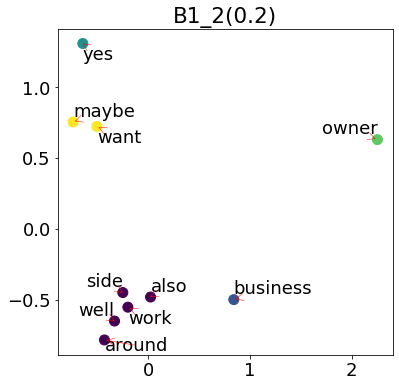

In [ ]:
### 劃出圖的範例
lab=display_pca_scatterplot_DBSCAN(word_vectors, top10_term['B1_5'],'B1_2(0.2)')

### K-Means

In [ ]:
def display_kmeans(model, words):
    # Take word vectors
    word_vectors = np.array([model[w] for w in words])   
    kmeans = KMeans(n_clusters=3, random_state=0).fit(word_vectors)
    
    return kmeans.labels_

In [ ]:
lab1=display_kmeans(word_vectors, top10_term[person1])
lab2=display_kmeans(word_vectors, top10_term[person2])

In [ ]:
####儲存分群後每個群裡面有哪些字詞
lab_0_per1=[]
lab_1_per1=[]
lab_2_per1=[]
lab_3_per1=[]


lab_0_per2=[]
lab_1_per2=[]
lab_2_per2=[]
lab_3_per2=[]

In [ ]:
### 把字詞分群 分別加入所屬list
for i in range(10):
  if lab1[i]==0:
        lab_0_per1.append(top10_term[person1][i])
  elif lab1[i]==1:
        lab_1_per1.append(top10_term[person1][i])
  elif lab1[i]==2:
        lab_2_per1.append(top10_term[person1][i])
  # elif lab1[i]==3:
  #       lab_3_per1.append(top10_term[person1][i])


  if lab2[i]==0:
        lab_0_per2.append(top10_term[person2][i])
  elif lab2[i]==1:
        lab_1_per2.append(top10_term[person2][i])
  elif lab2[i]==2:
        lab_2_per2.append(top10_term[person2][i])
  # elif lab2[i]==3:
  #       lab_3_per2.append(top10_term[person2][i])

In [ ]:
### 移除最大群 集合其他小群的字詞計算相似度
total_len1=[len(lab_0_per1),len(lab_1_per1),len(lab_2_per1)]
total_len2=[len(lab_0_per2),len(lab_1_per2),len(lab_2_per2)]

max1=total_len1.index(max(total_len1))
max2=total_len2.index(max(total_len2))

lab_list1=[lab_0_per1,lab_1_per1,lab_2_per1]
lab_list2=[lab_0_per2,lab_1_per2,lab_2_per2]

cut_max1=[]
cut_max2=[]

for i in range(3):
  if i != max1:
    for j in lab_list1[i]:
      cut_max1.append(j)
  if i != max2:
    for j in lab_list2[i]:
      cut_max2.append(j)

In [ ]:
Similarity1_Similarity2(cut_max1,cut_max2)

(0.5, 0.5)

## Part1~3整合

In [ ]:
def SummaryPart123(WithSW1,WithSW2,WithoutSW1,WithoutSW2,Semantic,DB1,DB2,KM1,KM2,Weight1,Weight2,Weight3):
  Weighted1Result=(WithSW1+WithSW2+WithoutSW1+WithoutSW2)/4*Weight1
  Weighted2Result=Semantic*Weight2
  Weighted3Result=(DB1+DB2+KM1+KM2)/4*Weight3

  TotalResult=Weighted1Result+Weighted2Result+Weighted3Result

  return TotalResult

In [ ]:
# Part 1
### 路徑記得改
### 人 語音段落 記得改
# 人的選項 A1 A2 B1 B2 段落選項 en1 en2 en3 en4 en5
person1='B1'
person2='B2'
en='5'
paragraph='en'+en

# with open('./20211103語音部分/%s/%s.txt'%(person1,paragraph), 'r') as f1:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person1,paragraph), 'r') as f1:
  w1=calculate_word(f1)
  output1=remove_stopword(w1)

# with open('./20211103語音部分/%s/%s.txt'%(person2,paragraph), 'r') as f2:
with open('./20220308語音加無線訊號/%s/%s.txt'%(person2,paragraph), 'r') as f2:
  w2=calculate_word(f2)
  output2=remove_stopword(w2)

In [ ]:
# Part 2
person1=B1_5_label
person2=B2_5_label

InnerProduct=np.dot(np.array(person1), np.array(person2))

In [ ]:
# Part 3
person1='B1_5'
person2='B2_5'

##DBSCAN
lab1=display_DBSCAN(word_vectors, top10_term[person1])
lab2=display_DBSCAN(word_vectors, top10_term[person2])
lab_0_per1=[]
lab_1_per1=[]
lab_2_per1=[]
lab_3_per1=[]
lab_4_per1=[]
lab_5_per1=[]
lab_6_per1=[]
lab_7_per1=[]
lab_8_per1=[]
lab_9_per1=[]

lab_0_per2=[]
lab_1_per2=[]
lab_2_per2=[]
lab_3_per2=[]
lab_4_per2=[]
lab_5_per2=[]
lab_6_per2=[]
lab_7_per2=[]
lab_8_per2=[]
lab_9_per2=[]

for i in range(10):
  if lab1[i]==0:
        lab_0_per1.append(top10_term[person1][i])
  elif lab1[i]==1:
        lab_1_per1.append(top10_term[person1][i])
  elif lab1[i]==2:
        lab_2_per1.append(top10_term[person1][i])
  elif lab1[i]==3:
        lab_3_per1.append(top10_term[person1][i])
  elif lab1[i]==4:
        lab_4_per1.append(top10_term[person1][i])
  elif lab1[i]==5:
        lab_5_per1.append(top10_term[person1][i])
  elif lab1[i]==6:
        lab_6_per1.append(top10_term[person1][i])
  elif lab1[i]==7:
        lab_7_per1.append(top10_term[person1][i])
  elif lab1[i]==8:
        lab_8_per1.append(top10_term[person1][i])
  elif lab1[i]==9:
        lab_9_per1.append(top10_term[person1][i])

  if lab2[i]==0:
        lab_0_per2.append(top10_term[person2][i])
  elif lab2[i]==1:
        lab_1_per2.append(top10_term[person2][i])
  elif lab2[i]==2:
        lab_2_per2.append(top10_term[person2][i])
  elif lab2[i]==3:
        lab_3_per2.append(top10_term[person2][i])
  elif lab2[i]==4:
        lab_4_per2.append(top10_term[person2][i])
  elif lab2[i]==5:
        lab_5_per2.append(top10_term[person2][i])
  elif lab2[i]==6:
        lab_6_per2.append(top10_term[person2][i])
  elif lab2[i]==7:
        lab_7_per2.append(top10_term[person2][i])
  elif lab2[i]==8:
        lab_8_per2.append(top10_term[person2][i])
  elif lab2[i]==9:
        lab_9_per2.append(top10_term[person2][i])

total_len1=[len(lab_0_per1),len(lab_1_per1),len(lab_2_per1),len(lab_3_per1),len(lab_4_per1),len(lab_5_per1),len(lab_6_per1),len(lab_7_per1),len(lab_8_per1),len(lab_9_per1)]
total_len2=[len(lab_0_per2),len(lab_1_per2),len(lab_2_per2),len(lab_3_per2),len(lab_4_per2),len(lab_5_per2),len(lab_6_per2),len(lab_7_per2),len(lab_8_per2),len(lab_9_per2)]

max1=total_len1.index(max(total_len1))
max2=total_len2.index(max(total_len2))

lab_list1=[lab_0_per1,lab_1_per1,lab_2_per1,lab_3_per1,lab_4_per1,lab_5_per1,lab_6_per1,lab_7_per1,lab_8_per1,lab_9_per1]
lab_list2=[lab_0_per2,lab_1_per2,lab_2_per2,lab_3_per2,lab_4_per2,lab_5_per2,lab_6_per2,lab_7_per2,lab_8_per2,lab_9_per2]

cut_max1_KM=[]
cut_max2_KM=[]

for i in range(10):
  if i != max1:
    for j in lab_list1[i]:
      cut_max1_KM.append(j)
  if i != max2:
    for j in lab_list2[i]:
      cut_max2_KM.append(j)

##K-Means
lab1=display_kmeans(word_vectors, top10_term[person1])
lab2=display_kmeans(word_vectors, top10_term[person2])

lab_0_per1=[]
lab_1_per1=[]
lab_2_per1=[]
lab_3_per1=[]


lab_0_per2=[]
lab_1_per2=[]
lab_2_per2=[]
lab_3_per2=[]

for i in range(10):
  if lab1[i]==0:
        lab_0_per1.append(top10_term[person1][i])
  elif lab1[i]==1:
        lab_1_per1.append(top10_term[person1][i])
  elif lab1[i]==2:
        lab_2_per1.append(top10_term[person1][i])
  # elif lab1[i]==3:
  #       lab_3_per1.append(top10_term[person1][i])


  if lab2[i]==0:
        lab_0_per2.append(top10_term[person2][i])
  elif lab2[i]==1:
        lab_1_per2.append(top10_term[person2][i])
  elif lab2[i]==2:
        lab_2_per2.append(top10_term[person2][i])
  # elif lab2[i]==3:
  #       lab_3_per2.append(top10_term[person2][i])

total_len1=[len(lab_0_per1),len(lab_1_per1),len(lab_2_per1)]
total_len2=[len(lab_0_per2),len(lab_1_per2),len(lab_2_per2)]

max1=total_len1.index(max(total_len1))
max2=total_len2.index(max(total_len2))

lab_list1=[lab_0_per1,lab_1_per1,lab_2_per1]
lab_list2=[lab_0_per2,lab_1_per2,lab_2_per2]

cut_max1=[]
cut_max2=[]

for i in range(3):
  if i != max1:
    for j in lab_list1[i]:
      cut_max1.append(j)
  if i != max2:
    for j in lab_list2[i]:
      cut_max2.append(j)

In [ ]:
#Part 1
WithStopWord1=Similarity1_Similarity2(w1,w2)[0]
WithStopWord2=Similarity1_Similarity2(w1,w2)[1]

WithoutStopWord1=Similarity1_Similarity2(output1,output2)[0]
WithoutStopWord2=Similarity1_Similarity2(output1,output2)[1]

# Part 2  ***記得修改是哪一段語音  Max_en'X'
if en=='1':
  Semantic_spaCy=InnerProduct/Max_en1
elif en=='2':
  Semantic_spaCy=InnerProduct/Max_en2
elif en=='3':
  Semantic_spaCy=InnerProduct/Max_en3
elif en=='4':
  Semantic_spaCy=InnerProduct/Max_en4
elif en=='5':
  Semantic_spaCy=InnerProduct/Max_en5  

# Part 3
DBSCAN1=Similarity1_Similarity2(cut_max1,cut_max2)[0]
DBSCAN2=Similarity1_Similarity2(cut_max1,cut_max2)[1]

KMeans1=Similarity1_Similarity2(cut_max1_KM,cut_max2_KM)[0]
KMeans2=Similarity1_Similarity2(cut_max1_KM,cut_max2_KM)[1]

print(person1,person2,en)
### Weight相加=1
# for i in range(1,9):
#   print(i/10)
#   for j in range(1,10-i):
#     k=10-i-j
#     Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,i/10,j/10,k/10)
#     print(Result)

### 先遮擋 gamma
# for i in range(1,10):
#   j=10-i
#   Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,i/10,j/10,0)
#   # print(i/10)
#   print(Result)

### 先遮擋 beta
# for i in range(1,10):
#   j=10-i
#   Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,i/10,0,j/10)
#   print(Result)


### 先遮擋 alpha
for i in range(1,10):
  j=10-i
  Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,0,i/10,j/10)
  print(Result)

B1_5 B2_5 5
0.06676470588235295
0.07241830065359478
0.0780718954248366
0.08372549019607843
0.08937908496732026
0.0950326797385621
0.10068627450980391
0.10633986928104575
0.11199346405228758


In [ ]:
### 丟進Function
# print("變動Weight1")
# for i in range(11):
#   Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,i/10,1,1)
#   print(Result)
# print("變動Weight2")
# for i in range(11):
#   Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,1,i/10,1)
#   print(Result)
# print("變動Weight3")
# for i in range(11):
#   Result=SummaryPart123(WithStopWord1,WithStopWord2,WithoutStopWord1,WithoutStopWord2,Semantic_spaCy,DBSCAN1,DBSCAN2,KMeans1,KMeans2,1,1,i/10)
#   print(Result)

## Signal Level

In [ ]:
### 要先把雜訊去除再做後續處理

### 去除雜訊

In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.io import wavfile
import noisereduce as nr

In [ ]:
# load data
rate, data = wavfile.read('./20211103語音部分/分段後音檔/B2_en5.wav')
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write('./20211103語音部分/去雜訊後音檔/B2_en5.wav', rate, reduced_noise)  ### 寫檔路徑

### 後續處理

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
import networkx as nx
from community import community_louvain
import random

In [ ]:
# 讀取 WAV 檔案
rate, data = read('./20220308語音加無線訊號/去雜訊後音檔/A1_en4.wav')
rate2, data2 = read('./20220308語音加無線訊號/去雜訊後音檔/A2_en4.wav')
rate3, data3 = read('./20220308語音加無線訊號/去雜訊後音檔/B1_en4.wav')
rate4, data4 = read('./20220308語音加無線訊號/去雜訊後音檔/B2_en4.wav')

In [ ]:
rate, data = read('./20211103語音部分/去雜訊後音檔/A1_en5.wav')
rate2, data2 = read('./20211103語音部分/去雜訊後音檔/A2_en5.wav')
rate3, data3 = read('./20211103語音部分/去雜訊後音檔/B1_en5.wav')
rate4, data4 = read('./20211103語音部分/去雜訊後音檔/B2_en5.wav')

In [ ]:
###演算法
# 1.將資料取絕對值
# 2.找出最大值 做normalize 然後乘上1000 所以會介於0~1000
# 3.計算該時間區段有沒有講話

In [ ]:
### 將資料取絕對值
Data1Abs=abs(data)
Data2Abs=abs(data2)
Data3Abs=abs(data3)
Data4Abs=abs(data4)

In [ ]:
### Normalize處理
temp1=Data1Abs.max()
temp2=Data2Abs.max()
temp3=Data3Abs.max()
temp4=Data4Abs.max()
for i in range(len(Data1Abs)):
  Data1Abs[i]=Data1Abs[i]/temp1*1000
for j in range(len(Data2Abs)):
  Data2Abs[j]=Data2Abs[j]/temp2*1000
for k in range(len(Data3Abs)):
  Data3Abs[k]=Data3Abs[k]/temp3*1000
for l in range(len(Data4Abs)):
  Data4Abs[l]=Data4Abs[l]/temp4*1000

In [ ]:
### 設定兩個Threshold 
Threshold_db=75 # 大於這個值就算有說話
Threshold_Percentage=0.3 # 在一秒內超過這個比例有講話就算是這一秒有講話
Second=0.25 # 設定時間區間(秒)
TimePeriod=int(16000*Second) # 16000是以1秒為單位 8000是以0.5秒為單位

In [ ]:
### 宣告說話時間說話時間List
SpeakTime1=[]
SpeakTime2=[]
SpeakTime3=[]
SpeakTime4=[]

In [ ]:
length=min(len(Data1Abs),len(Data2Abs),len(Data3Abs),len(Data4Abs))  ###以最短那段為主
Percent=TimePeriod*Threshold_Percentage
for i in range(int(length/TimePeriod)):
  counter1=0
  counter2=0
  counter3=0
  counter4=0
  for j in range(TimePeriod):
    if Data1Abs[TimePeriod*i+j]>Threshold_db:
      counter1+=1
    if Data2Abs[TimePeriod*i+j]>Threshold_db:
      counter2+=1
    if Data3Abs[TimePeriod*i+j]>Threshold_db:
      counter3+=1
    if Data4Abs[TimePeriod*i+j]>Threshold_db:
      counter4+=1
  if counter1>Percent: #如果有達到一定比例 就算是那秒有講話 設定為1 否則為0
    SpeakTime1.append(1)
  else:
    SpeakTime1.append(0)
  if counter2>Percent: 
    SpeakTime2.append(1)
  else:
    SpeakTime2.append(0)
  if counter3>Percent: 
    SpeakTime3.append(1)
  else:
    SpeakTime3.append(0)
  if counter4>Percent: 
    SpeakTime4.append(1)
  else:
    SpeakTime4.append(0)

In [ ]:
### 計算Hamming Distance
def similarity(hash1_, hash2_):
    return abs(hash1_-hash2_).sum()

In [ ]:
### 轉換成numpy array 並把哪一個時間點有講話列出來  總共四個人
SpeakTime1_arr=np.array(SpeakTime1)  #轉換
SpeakTime2_arr=np.array(SpeakTime2)
SpeakTime3_arr=np.array(SpeakTime3)
SpeakTime4_arr=np.array(SpeakTime4)

In [ ]:
###把時間點列出來
print(np.where(SpeakTime1_arr >0))  #列出來
print(np.where(SpeakTime2_arr >0))
print(np.where(SpeakTime3_arr >0))
print(np.where(SpeakTime4_arr >0))

(array([  3,  25,  36,  42,  47, 114, 118, 136, 141, 142, 143, 148, 167,
       175, 180, 201, 202, 223, 234, 235, 266, 267, 273, 274, 285, 295,
       312, 354, 357, 360, 398, 399, 401, 402, 405, 426, 434, 469, 470,
       471, 477]),)
(array([  4,   8,   9,  10,  11,  16,  18,  19,  54,  55,  56,  57,  60,
        63,  64,  65,  66,  67,  69,  70,  71,  76,  82,  86,  90,  96,
        98, 101, 103, 104, 105, 115, 124, 125, 126, 127, 128, 129, 149,
       153, 157, 159, 160, 161, 163, 168, 190, 191, 192, 193, 194, 195,
       196, 202, 238, 254, 257, 258, 259, 260, 262, 274, 283, 284, 286,
       287, 292, 296, 298, 299, 301, 304, 307, 308, 329, 330, 333, 336,
       339, 344, 348, 349, 369, 370, 374, 376, 386, 387, 388, 413, 414,
       415, 417, 419, 420, 427, 441, 442, 445, 446, 447, 449, 451, 460,
       462, 463, 464, 465]),)
(array([  2,   3,   4,   7,   9,  10,  11,  12,  19,  21,  25,  26,  27,
        43,  47,  50,  51,  58,  61,  63,  75,  77,  97, 100, 101, 115,
       116,

In [ ]:
### 把大家關係加到List 以利畫圖
WeightList=[]
WeightList.append(similarity(SpeakTime1_arr,SpeakTime2_arr)/int(length/TimePeriod)) ###同群 應該要大
WeightList.append(similarity(SpeakTime1_arr,SpeakTime3_arr)/int(length/TimePeriod))
WeightList.append(similarity(SpeakTime1_arr,SpeakTime4_arr)/int(length/TimePeriod))
WeightList.append(similarity(SpeakTime2_arr,SpeakTime3_arr)/int(length/TimePeriod))
WeightList.append(similarity(SpeakTime2_arr,SpeakTime4_arr)/int(length/TimePeriod))
WeightList.append(similarity(SpeakTime3_arr,SpeakTime4_arr)/int(length/TimePeriod)) ###同群 應該要大

In [ ]:
### 把大家的關係印出來
print(WeightList)

[0.2975929978118162, 0.24726477024070023, 0.27571115973741794, 0.22538293216630198, 0.2188183807439825, 0.12910284463894967]


In [ ]:
def generate_network(WeightList):
    G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
    G.add_weighted_edges_from([('A1', 'A2', WeightList[0]),
                               ('A1', 'B1', WeightList[1]),
                               ('A1', 'B2', WeightList[2]),
                               ('A2', 'B1', WeightList[3]),
                               ('A2', 'B2', WeightList[4]),
                               ('B1', 'B2', WeightList[5])
                               ])
    return G

In [ ]:
G = generate_network(WeightList)
comms = community_louvain.best_partition(G, randomize=True,resolution=1.35)
print(comms)

{'A1': 0, 'A2': 0, 'B1': 1, 'B2': 0}


In [ ]:
counter=1000
CorrectNumber=0
for i in range(counter):
  comms = community_louvain.best_partition(G, randomize=True,resolution=1.35)
  if (comms['A1'] == comms['A2']) and(comms['B1'] == comms['B2']) and(comms['A1'] != comms['B1']):
    CorrectNumber+=1
  elif (comms['A1'] == comms['A2'])and(comms['B1'] != comms['B2']) :
    CorrectNumber+=0.5
  elif (comms['B1'] == comms['B2'])and(comms['A1'] != comms['A2']):
    CorrectNumber+=0.5
  # print(comms)
print(Threshold_db,Threshold_Percentage,Second)
print(CorrectNumber/counter)

75 0.3 0.25
0.5


## 畫圖區

### 4*4對稱矩陣顏色圖

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable
from matplotlib.colors import ListedColormap

In [ ]:
en1=[]

In [ ]:
plt.figure(figsize=(11,9),dpi=70)
plt.title('English 5', fontsize=25)

sns.heatmap(data=en5,
            vmax=1, 
            vmin=0,
            # cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            cmap="YlGnBu",
            # cmap=ListedColormap(['green', 'yellow', 'red','blue','pink']),
            # cmap="gist_rainbow",
            annot=True,#图中数字文本显示
            fmt=".3f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':30,'weight':'normal', 'color':'#aaaaaa'},#数字属性设置，例如字号、磅值、颜色   .      
           )
# plt.savefig('./20211103語音部分/圖檔/Part16/en5.png')  ###看要不要存檔

### 網絡關係圖

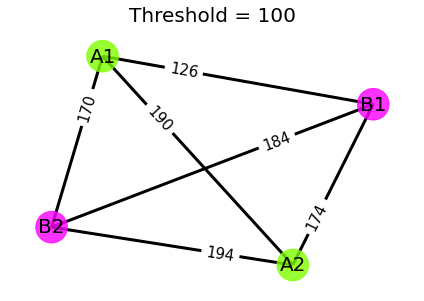

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

###以下的Weight記得要改
G.add_edge("A1", "A2", weight=WeightList[0])
G.add_edge("A1", "B1", weight=WeightList[1])
G.add_edge("A1", "B2", weight=WeightList[2])
G.add_edge("A2", "B1", weight=WeightList[3])
G.add_edge("A2", "B2", weight=WeightList[4])
G.add_edge("B1", "B2", weight=WeightList[5])

color=['#7FFF00','#7FFF00','#ff00ff','#ff00ff']  ### Node的顏色

elarge = [(u, v) for (u, v, d) in G.edges(data=True)]


pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=1000,alpha=0.8,node_color=color)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)


# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=0.7,font_size=15)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.title('Threshold = 100',fontsize=20)  ###圖標題要改
plt.show()